# Lab 4
## Introduction
The Euler method is a method for numerically solving a DE of the form
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y).
\end{align}

It is often necessary to solve DEs this way as analytical solutions are the exception
rather than the rule.

<img src="images/euler-one.png" style="width: 350px;"/>

Euler’s method works by approximating small segments of the curve solution to the DE
with the straight-line tangent or slope of the curve. As long as we keep the segments
small enough, they will approximately match what the actual curve looks like. It requires us to ”know” an initial value $y(x_0) = y_0$ so we can start the calculation.

To calculate the first segment we start off with our known start point $(x_0, y_0)$, and calculate the end point, $(x_1, y_1)$. We can define $\Delta x$ to be some constant small distance so that we always increment the $x$ value by the same amount. Then, $\Delta y = m \Delta x$ and $(x_1, y_1)=(x_0, y_0)+(\Delta x, m\Delta x)$.

<img src="images/euler-two.png" style="width: 250px;"/>

But, we also know that $m$, the slope of the line, is given by $\mathrm{d}y/\mathrm{d}x$, i.e., $f(x, y)$ evaluated at $(x_0, y_0)$. So actually, $\Delta y = f(x_0, y_0) \Delta x$.

The final step is to calculate the new point: the point at the end of the first line segment. This point is then given by $(x_1, y_1) = (x_0 + \Delta x, y_0 + f(x_0, y_0) \Delta x)$.

We then do it again to calculate $(x_2, y_2)$ using $(x_1, y_1)$ as our starting point. We then do it again to calculate $(x_3, y_3)$ using $(x_2, y_2)$ as our starting point and so on.

**Summary:** The Euler method for evaluating a DE of the form
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = f(x,y).
\end{align}
involves the iterative calculation of
\begin{align}
x_{n+1} &= x_n + \Delta x\\
\text{and}\quad y_{n+1} &= y_n + f(x_n,y_n)\Delta x.
\end{align}

### Implementation

First import the necessary functions from NumPy and SciPy and set up Plotly.

In [1]:
from numpy import arange, empty, exp
from plotly import graph_objs as go

Now let's write a function that implements Euler's method. We will model it on `scipy.integrate.odeint`. We will make slight changes to the parameters because we want to input $\Delta x$. Note that the string (delimited by triple quotes) immediately after the function definition is a _docstring_. It tells us what the function does and is good programming practice. The prodigious comments in the function body are not generally necessary but are included for you.

In [2]:
def euler(func, y0, x0, xn, Dx):
    """
    Integrate an ordinary differential equation using Euler's method.
    
    Solves the initial value problem for systems of first order ode-s::
        dy/dx = func(y, x).
        
    Parameters
    ----------
    func : callable(y, x)
        Computes the derivative of y at x.
    y0 : float
        Initial condition on y.
    x0 : float
        Initial condition on x.
    xn : float
        Upper limit to value of x.
    Dx : float
        x increment.
        
    Returns
    -------
    x : float
        Array containing the value of x for each value of x0 + n * Dx,
        where n ranges from zero to floor( (xn - x0) / Dx ).
    y : float
        Array containing the value of y for each value of x.
    """
    x = arange(x0, xn, Dx)  # Create the x array
    y = empty(len(x))  # Create an empty y array of the same length as x
    y[0] = y0  # Set the first value of y to y0
    for n in range(len(x) - 1):  # Loop to populate the rest of the values of y
        y[n+1] = y[n] + func(y[n], x[n]) * Dx  # Euler's method
    
    return x, y  # Return x and y as a pair

First try solving
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = y.
\end{align}
for $y(0)=1$ for $x$ between 1 and 5 and using $\Delta x=1$.

In [3]:
def diff_eq(y, x):
    return y

x, y = euler(diff_eq, 1, 0, 5.01, 1)

Why was `xn` set to 5.01 rather than 5?

We know that the analytic solution to the above IVP is $y=\mathrm{e}^x$, so calculate that as well.

In [4]:
x_analytic = arange(0, 5.01, 0.1)
y_analytic = exp(x_analytic)

Now plot them both for comparison.

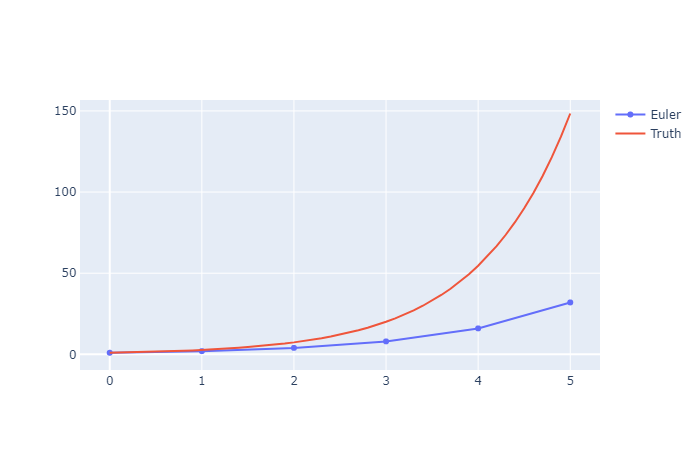

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')

Reproduce the comparison plot below but with $\Delta x=0.1$.

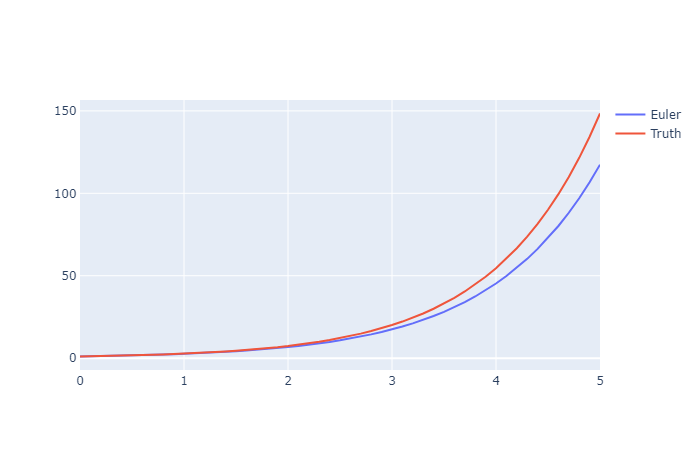

In [10]:
x, y = euler(diff_eq, 1, 0, 5.01, 0.1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')


It is possible to quantify the error in the Euler solution compared to the analytic solution. To do this you need to re-calculate the analytic solution at the same $x$ points as you calculated your Euler solution. Then you can do a Mean Squared Error (MSE) comparison between the two.

In [11]:
x, y = euler(diff_eq, 1, 0, 5.01, 1)
y_analytic = exp(x)
((y_analytic - y)**2).mean()

2533.317105161909

Note that `((y_analytic - y)**2)` returned an `array` object, and then we called the `mean` method that was _bound_ to that object.

What is the MSE if $\Delta x = 0.1$?

In [12]:
x, y = euler(diff_eq, 1, 0, 5.01, 0.1)
y_analytic = exp(x)
((y_analytic - y)**2).mean()

88.60637343780924

## Exercises

In this lab you will try Euler's method for a couple of differential equations.

1.  a. Consider the IVP
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}x} = 2x\quad\text{where}\quad y(-2)=4.
\end{align}
Calculate the Euler approximation on the interval $x=[-2,2]$ using a step size of $\Delta x = 0.5$. On the same figure, plot your approximation and the analytic solution.

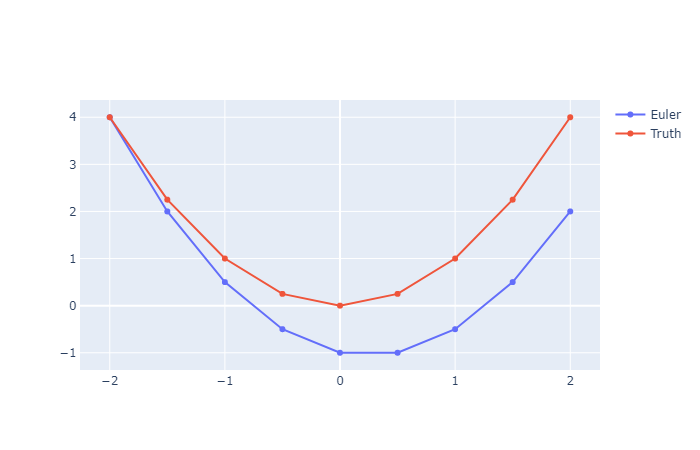

In [18]:
def diff_eq(y, x):
    return 2*x

x, y = euler(diff_eq, 4, -2, 2.01, 0.5)

x_analytic = arange(-2, 2.01, 0.5)
y_analytic = (x_analytic)**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')

1.  b. Calculate the mean squared error (MSE) of the approximation.

In [19]:
x, y = euler(diff_eq, 4, -2, 2.01, 0.5)
y_analytic = (x)**2
((y_analytic - y)**2).mean()

1.4166666666666667

1.  c. Reproduce your plot from 1a except with $\Delta x=0.1$.

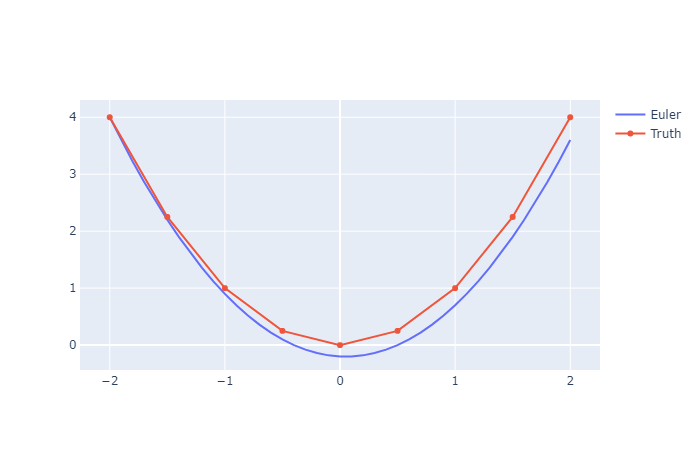

In [20]:
x, y = euler(diff_eq, 4, -2, 2.01, 0.1)

x_analytic = arange(-2, 2.01, 0.5)
y_analytic = (x_analytic)**2

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')

1.  d. Recalculate the MSE.

In [21]:
x, y = euler(diff_eq, 4, -2, 2.01, 0.1)
y_analytic = (x)**2
((y_analytic - y)**2).mean()

0.053999999999998854

2.  a. The following is the DE for the arrow problem from class.
\begin{align}
\frac{\mathrm{d}y}{\mathrm{d}t} = 294\mathrm{e}^{-0.04t}-245\quad\text{where}\quad y(0)=0
\end{align}
Calculate the Euler approximation to the solution on the interval  $t=[0,10]$ with $\Delta t=0.5$. Plot your approximation and the analytic solution on the same figure.

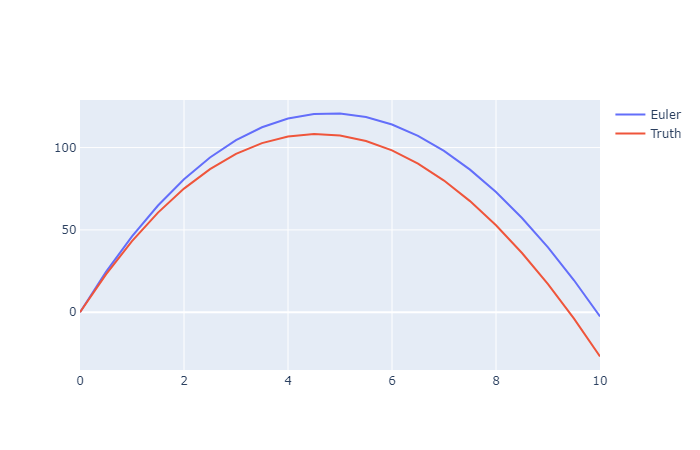

In [32]:
def diff_eq(y, x):
    return (294*exp(-0.04*x)) - 245

x, y = euler(diff_eq, 0, 0, 10.01, 0.5)

x_analytic = arange(0, 10.01, 0.5)
y_analytic = (-7350*exp(-0.04*x_analytic)) - 245*x + 7350

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')

2.  b. Calculate the MSE of the approximation.

In [33]:
x, y = euler(diff_eq, 0, 0, 10.01, 0.5)
y_analytic = (-7350*exp(-0.04*x)) - 245*x + 7350
((y_analytic - y)**2).mean()

221.1226824539981

2.  c. Reproduce your plot from 2a except with $\Delta t=0.1$.

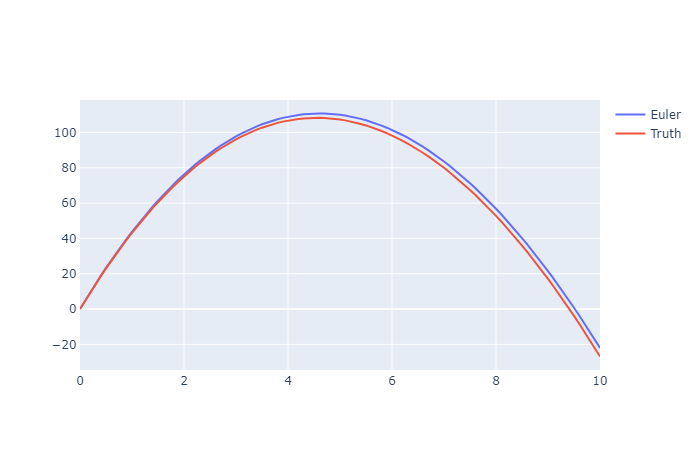

In [34]:
x, y = euler(diff_eq, 0, 0, 10.01, 0.1)

x_analytic = arange(0, 10.01, 0.1)
y_analytic = (-7350*exp(-0.04*x_analytic)) - 245*x +7350

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                         name='Euler'))
fig.add_trace(go.Scatter(x=x_analytic,
                         y=y_analytic,
                         name='Truth'))
fig.show('png')

2.  d. Recalculate the MSE.

In [35]:
x, y = euler(diff_eq, 0, 0, 10.01, 0.1)
y_analytic = (-7350*exp(-0.04*x)) - 245*x +7350
((y_analytic - y)**2).mean()

8.673112166785117